# Section A

In [1]:
%run NASA_log_analytics

23/06/25 13:37:56 WARN Utils: Your hostname, YuHsins-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.224 instead (on interface en0)
23/06/25 13:37:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/06/25 13:37:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
logs_df = create_logs_df()

logs_df.show(10, truncate=False)
print((logs_df.count(), len(logs_df.columns)))

+-------------+-----------------------------------------------+------+
|Day in a week|endpoint                                       |status|
+-------------+-----------------------------------------------+------+
|Saturday     |/history/apollo/                               |200   |
|Saturday     |/shuttle/countdown/                            |200   |
|Saturday     |/shuttle/missions/sts-73/mission-sts-73.html   |200   |
|Saturday     |/shuttle/countdown/liftoff.html                |304   |
|Saturday     |/shuttle/missions/sts-73/sts-73-patch-small.gif|200   |
|Saturday     |/images/NASA-logosmall.gif                     |304   |
|Saturday     |/shuttle/countdown/video/livevideo.gif         |200   |
|Saturday     |/shuttle/countdown/countdown.html              |200   |
|Saturday     |/shuttle/countdown/                            |200   |
|Saturday     |/                                              |200   |
+-------------+-----------------------------------------------+------+
only s

## 3.1
Generate the output presenting the endpoint that received the highest number of invocations on a specific day of the week, along with the corresponding count of invocations.

In [3]:
top_invocation = endpoint_invocations_by_day(logs_df)

top_invocation.show(truncate=False)

+-------------+--------------------------+-----+
|Day in a week|endpoint                  |count|
+-------------+--------------------------+-----+
|Friday       |/images/NASA-logosmall.gif|29139|
|Monday       |/images/NASA-logosmall.gif|30380|
|Saturday     |/images/NASA-logosmall.gif|16168|
|Sunday       |/images/KSC-logosmall.gif |15218|
|Thursday     |/images/NASA-logosmall.gif|46920|
|Tuesday      |/images/NASA-logosmall.gif|33685|
|Wednesday    |/images/NASA-logosmall.gif|37598|
+-------------+--------------------------+-----+



## 3.2
Total number of 404 status codes generated in each day of a week(For Monday, Tuesday,..… Sunday) for the entire dataset.

In [4]:
status404_Count = status404_Count_by_Day(logs_df)

status404_Count.show(truncate=False)

+-------------+------+-----+
|Day in a week|status|count|
+-------------+------+-----+
|Saturday     |404   |2069 |
|Wednesday    |404   |3397 |
|Sunday       |404   |2400 |
|Friday       |404   |2691 |
|Tuesday      |404   |3425 |
|Monday       |404   |3145 |
|Thursday     |404   |3772 |
+-------------+------+-----+



<AxesSubplot: xlabel='Day in a week', ylabel='count'>

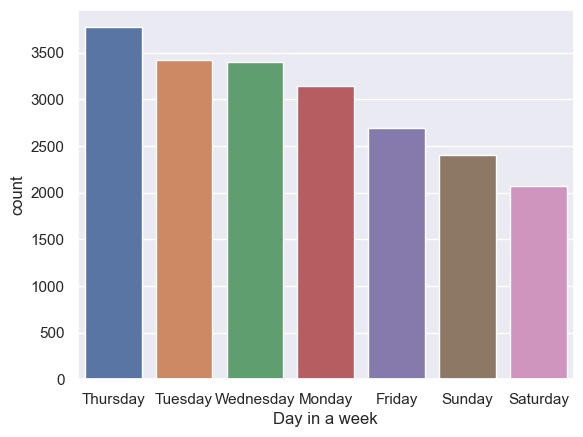

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

status_df = (status404_Count.toPandas().sort_values(by=['count'], ascending=False))

sns.barplot(x='Day in a week', y='count', data=status_df)